In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
%matplotlib inline

In [138]:
Accidents = pd.read_csv(r"C:\Users\Administrator\Desktop\Machine Learning\Accidents\Accidents.csv")
Accidents

,Speed (mph),Drunk Driving (%),Weather,Accident Severity
0,55,5,Clear,3
1,45,2,Rainy,6
2,60,8,Clear,8
3,40,1,Foggy,2
4,65,4,Rainy,9
...,...,...,...,...
84,60,1,Rainy,9
85,45,6,Snowy,5
86,64,2,Foggy,6
87,53,7,Clear,8


In [126]:
Y = Accidents.iloc[:,:-1].values
X = Accidents.iloc[:3].values

# Accidents.head()

In [121]:
sn.heatmap(Accidents.corr())

In [253]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

Y = Accidents.iloc[:,-1].values

X = Accidents.iloc[:,:-1].values


labelEncoder = LabelEncoder()

X[:,2] = labelEncoder.fit_transform(X[:,2])

ct = ColumnTransformer([('Weather', OneHotEncoder(),[2])], remainder='passthrough')

X = ct.fit_transform(X)

X = X[:,1:]

Y = Y.reshape(-1, 1)


Y = X + Y


In [210]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2,random_state=0)

In [211]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [212]:
y_pred = regressor.predict(X_test)
y_pred

array([[ 7.37422473,  7.37422473,  7.37422473, 67.37422473, 15.37422473],
       [ 4.96610557,  4.96610557,  5.96610557, 52.96610557,  7.96610557],
       [ 5.59218467,  5.59218467,  6.59218467, 55.59218467,  9.59218467],
       [ 6.29637521,  6.29637521,  6.29637521, 60.29637521, 14.29637521],
       [ 5.33072167,  5.33072167,  6.33072167, 58.33072167,  6.33072167],
       [ 9.52992377,  9.52992377,  9.52992377, 81.52992377, 17.52992377],
       [ 7.74255078,  7.74255078,  8.74255078, 66.74255078, 13.74255078],
       [ 8.64653741,  9.64653741,  8.64653741, 76.64653741, 11.64653741],
       [ 6.38886246,  6.38886246,  6.38886246, 62.38886246, 13.38886246],
       [ 5.41298884,  6.41298884,  5.41298884, 55.41298884,  8.41298884],
       [ 5.41298884,  6.41298884,  5.41298884, 55.41298884,  8.41298884],
       [ 6.48668265,  6.48668265,  6.48668265, 67.48668265, 10.48668265],
       [ 4.09290268,  3.09290268,  3.09290268, 47.09290268,  4.09290268],
       [ 5.8700922 ,  6.8700922 ,  5.8

In [213]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.7610173514430285

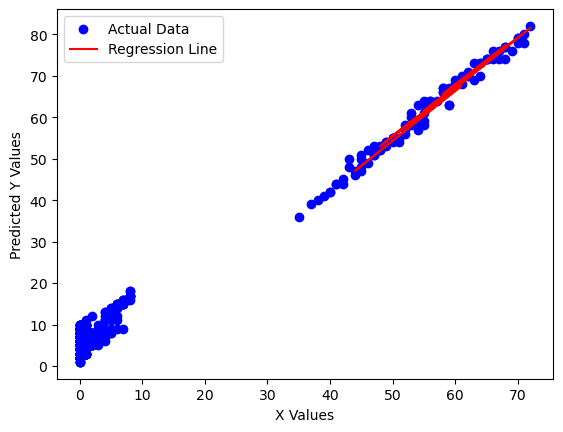

In [262]:
import matplotlib.pyplot as plt


plt.scatter(X[:,3], Y[:,3}, c='blue', label="Actual Data")

plt.plot(X_test[:,3], y_pred[:,3], color='red', label="Regression Line")


plt.xlabel("X Values")
plt.ylabel("Predicted Y Values")
plt.legend()

plt.show()